In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import os

In [2]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\07 USA Housing Selling Price Prediction")
df = pd.read_csv("USA_Housing.csv")
df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


## Identifying the dimensions

In [3]:
df.shape

(5000, 7)

In [4]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## Variable identification

In [6]:
df.dtypes

Avg_Area_Income                float64
Avg_Area_House_Age             float64
Avg_Area_Number_of_Rooms       float64
Avg_Area_Number_of_Bedrooms    float64
Area_Population                float64
Price                          float64
Address                         object
dtype: object

In [7]:
categorical = []
continuous = []
for column in df.columns:
    if df[column].dtypes == "int64" or df[column].dtypes == "float64":
        continuous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [8]:
categorical,continuous

(['Address'],
 ['Avg_Area_Income',
  'Avg_Area_House_Age',
  'Avg_Area_Number_of_Rooms',
  'Avg_Area_Number_of_Bedrooms',
  'Area_Population',
  'Price'])

## Univariant Analysis

In [9]:
df.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

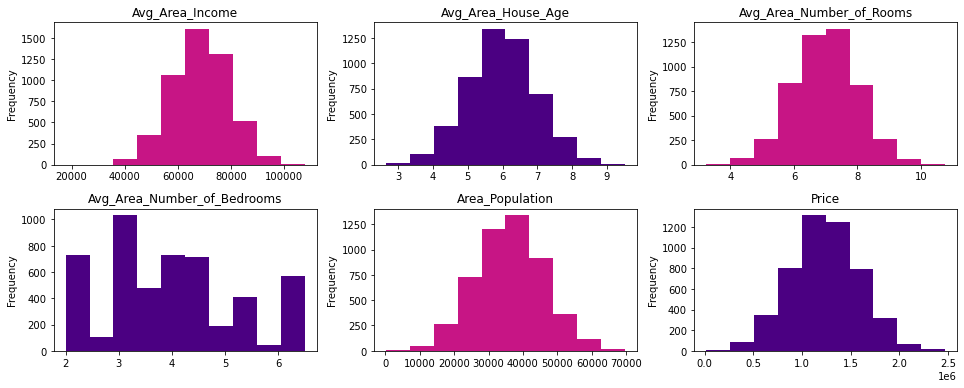

In [14]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 3)
  
df['Avg_Area_Income'].plot.hist(title="Avg_Area_Income",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Avg_Area_House_Age'].plot.hist(title="Avg_Area_House_Age",ax=axis[0][1],color="INDIGO")
df['Avg_Area_Number_of_Rooms'].plot.hist(title="Avg_Area_Number_of_Rooms",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Avg_Area_Number_of_Bedrooms'].plot.hist(title="Avg_Area_Number_of_Bedrooms",ax=axis[1][0],color="INDIGO")
df['Area_Population'].plot.hist(title="Area_Population",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Price'].plot.hist(title="Price",ax=axis[1][2],color="INDIGO")

<AxesSubplot:title={'center':'Price'}>

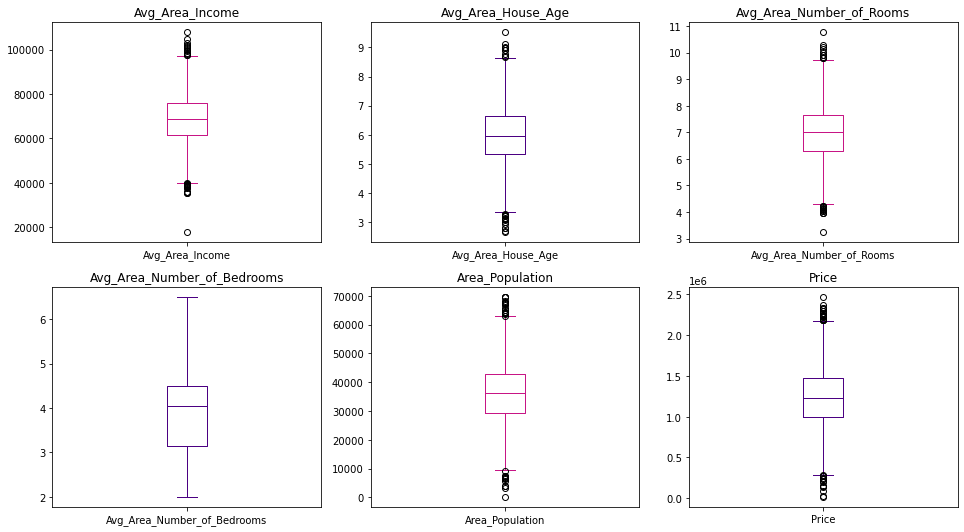

In [20]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 3)
  
df['Avg_Area_Income'].plot.box(title="Avg_Area_Income",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Avg_Area_House_Age'].plot.box(title="Avg_Area_House_Age",ax=axis[0][1],color="INDIGO")
df['Avg_Area_Number_of_Rooms'].plot.box(title="Avg_Area_Number_of_Rooms",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Avg_Area_Number_of_Bedrooms'].plot.box(title="Avg_Area_Number_of_Bedrooms",ax=axis[1][0],color="INDIGO")
df['Area_Population'].plot.box(title="Area_Population",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Price'].plot.box(title="Price",ax=axis[1][2],color="INDIGO")

In [11]:
len(df['Address'].unique())

5000

## Bivarient Analysis

In [34]:
df.corr()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


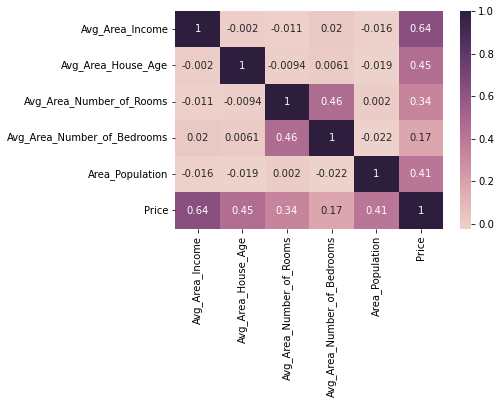

In [35]:
dataplot = sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

<AxesSubplot:title={'center':'Avg_Area_Number_of_Rooms'}, xlabel='Avg_Area_Number_of_Rooms', ylabel='Price'>

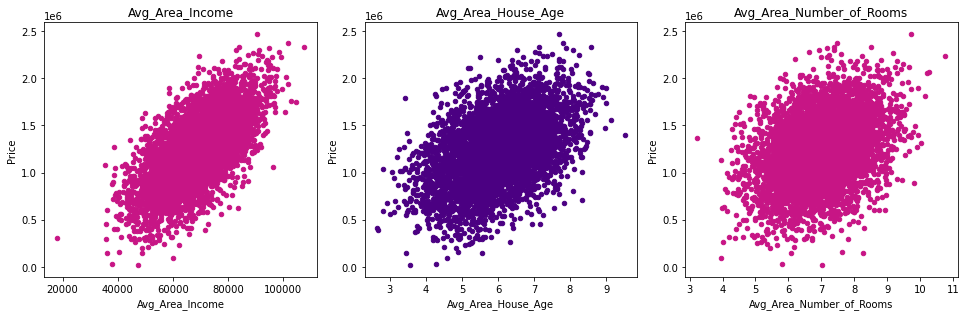

In [27]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)
  
df.plot.scatter('Avg_Area_Income','Price',title="Avg_Area_Income",ax=axis[0],color="MEDIUMVIOLETRED")
df.plot.scatter('Avg_Area_House_Age','Price',title="Avg_Area_House_Age",ax=axis[1],color="INDIGO")
df.plot.scatter('Avg_Area_Number_of_Rooms','Price',title="Avg_Area_Number_of_Rooms",ax=axis[2],color="MEDIUMVIOLETRED")

<AxesSubplot:title={'center':'Area_Population'}, xlabel='Area_Population', ylabel='Price'>

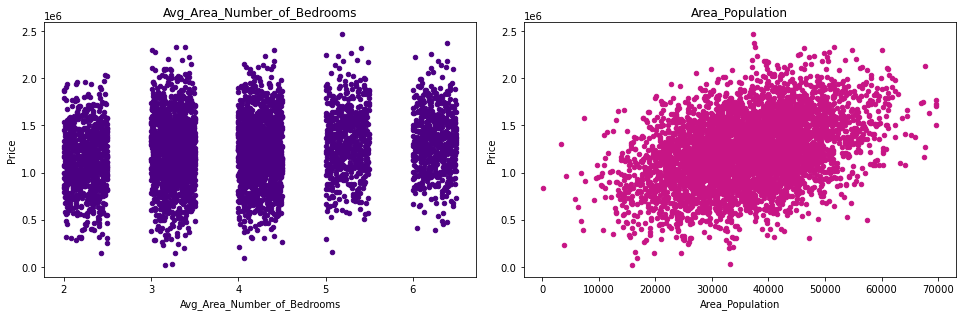

In [30]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)
df.plot.scatter('Avg_Area_Number_of_Bedrooms','Price',title="Avg_Area_Number_of_Bedrooms",ax=axis[0],color="INDIGO")
df.plot.scatter('Area_Population','Price',title="Area_Population",ax=axis[1],color="MEDIUMVIOLETRED")

In [31]:
df.drop(['Avg_Area_Number_of_Bedrooms'], axis=1, inplace=True)

In [32]:
df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


## Missing Value Treatment

In [33]:
df.isnull().sum()

Avg_Area_Income             0
Avg_Area_House_Age          0
Avg_Area_Number_of_Rooms    0
Area_Population             0
Price                       0
Address                     0
dtype: int64

## Outliers Treatement

<AxesSubplot:title={'center':'Avg_Area_Number_of_Rooms'}>

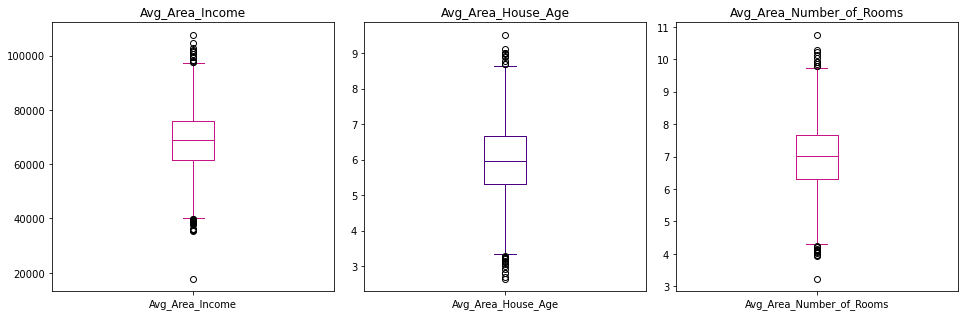

In [39]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 3)
  
df['Avg_Area_Income'].plot.box(title="Avg_Area_Income",ax=axis[0],color="MEDIUMVIOLETRED")
df['Avg_Area_House_Age'].plot.box(title="Avg_Area_House_Age",ax=axis[1],color="INDIGO")
df['Avg_Area_Number_of_Rooms'].plot.box(title="Avg_Area_Number_of_Rooms",ax=axis[2],color="MEDIUMVIOLETRED")

<AxesSubplot:title={'center':'Price'}>

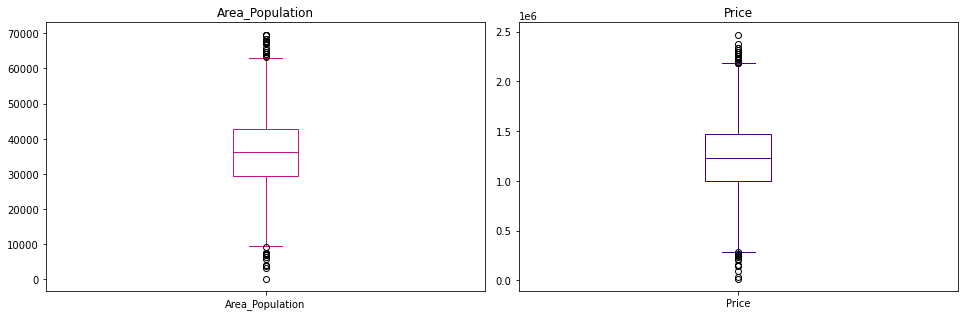

In [40]:
# Initialise the subplot function using number of rows and columns
plt.rcParams["figure.figsize"] = [13.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

df['Area_Population'].plot.box(title="Area_Population",ax=axis[0],color="MEDIUMVIOLETRED")
df['Price'].plot.box(title="Price",ax=axis[1],color="INDIGO")

In [41]:
Q1 = df.Avg_Area_Income.quantile(0.25)
Q3 = df.Avg_Area_Income.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df.loc[df['Avg_Area_Income']<=lower_limit] = np.mean(df['Avg_Area_Income'])
df.loc[df['Avg_Area_Income']>upper_limit] = np.mean(df['Avg_Area_Income'])

In [42]:
Q1 = df.Avg_Area_House_Age.quantile(0.25)
Q3 = df.Avg_Area_House_Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df.loc[df['Avg_Area_House_Age']<=lower_limit] = np.mean(df['Avg_Area_House_Age'])
df.loc[df['Avg_Area_House_Age']>upper_limit] = np.mean(df['Avg_Area_House_Age'])

In [43]:
Q1 = df.Avg_Area_Number_of_Rooms.quantile(0.25)
Q3 = df.Avg_Area_Number_of_Rooms.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df.loc[df['Avg_Area_Number_of_Rooms']<=lower_limit] = np.mean(df['Avg_Area_Number_of_Rooms'])
df.loc[df['Avg_Area_Number_of_Rooms']>upper_limit] = np.mean(df['Avg_Area_Number_of_Rooms'])

In [44]:
Q1 = df.Area_Population.quantile(0.25)
Q3 = df.Area_Population.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df.loc[df['Area_Population']<=lower_limit] = np.mean(df['Area_Population'])
df.loc[df['Area_Population']>upper_limit] = np.mean(df['Area_Population'])

In [45]:
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

df.loc[df['Price']<=lower_limit] = np.mean(df['Price'])
df.loc[df['Price']>upper_limit] = np.mean(df['Price'])

In [46]:
df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


## Exporting Selected Data

In [55]:
df.to_csv('USA_Housing_FS.csv', encoding='utf-8', index=False)